## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata)
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [2]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview
mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Time
duplicate_mouse = mouse_study_data.loc[mouse_study_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_study_data[mouse_study_data['Mouse ID'].isin(duplicate_mouse) == False]
cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = len(cleaned_mouse_data['Mouse ID'].unique())
clean_number_mice

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_grouping_count = cleaned_mouse_data.groupby(['Drug Regimen']).count()
drug_grouping_mean = cleaned_mouse_data.groupby(['Drug Regimen']).mean()
drug_grouping_median = cleaned_mouse_data.groupby(['Drug Regimen']).median()
drug_grouping_var = cleaned_mouse_data.groupby(['Drug Regimen']).var()
drug_grouping_stddev = cleaned_mouse_data.groupby(['Drug Regimen']).std()
drug_grouping_sem = cleaned_mouse_data.groupby(['Drug Regimen']).sem()
#drug_grouping_mean
#drug_grouping_median
#drug_grouping_var
#drug_grouping_stddev
#drug_grouping_sem
#drug_grouping_count

In [23]:
drug_grouping_stats = pd.DataFrame(drug_grouping_count['Tumor Volume (mm3)'])
drug_grouping_stats = drug_grouping_stats.rename(columns = {"Tumor Volume (mm3)": "Count"})
drug_grouping_stats['Mean'] = drug_grouping_mean['Tumor Volume (mm3)']
drug_grouping_stats['Median'] = drug_grouping_median['Tumor Volume (mm3)']
drug_grouping_stats['Variance'] = drug_grouping_var['Tumor Volume (mm3)']
drug_grouping_stats['Standard Deviation'] = drug_grouping_stddev['Tumor Volume (mm3)']
drug_grouping_stats['Standard Error'] = drug_grouping_sem['Tumor Volume (mm3)']
drug_grouping_stats

,Count,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

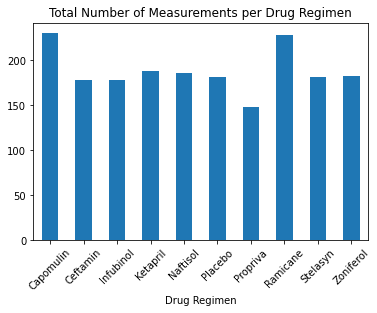

In [58]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_grouping_stats.plot(kind = 'bar', y='Count', rot=45, title = "Total Number of Measurements per Drug Regimen", legend = False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

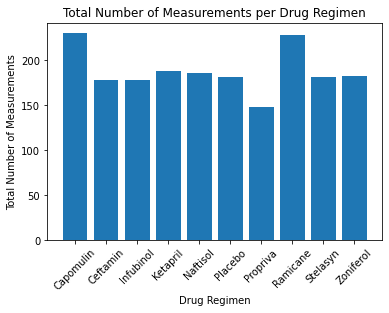

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = drug_grouping_stats.index
y_axis = drug_grouping_stats["Count"]
plt.bar(x_axis, y_axis, align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements per Drug Regimen")
plt.xticks(rotation=45)
plt.show()

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_demo = cleaned_mouse_data.drop_duplicates(subset=['Mouse ID'])
mouse_demo


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


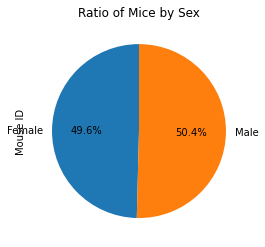

In [59]:
mouse_sex = mouse_demo.groupby(['Sex']).count()
mouse_sex
mouse_sex.plot(kind = 'pie', y='Mouse ID',title = "Ratio of Mice by Sex", legend = False, autopct="%1.1f%%", startangle = 90)


Text(0.5, 1.0, 'Ratio of Mice by Sex')

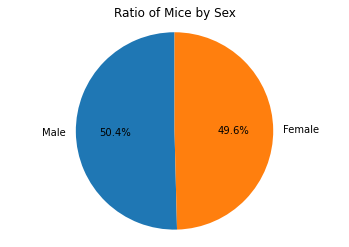

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
values = mouse_demo['Sex'].value_counts()
plt.pie(values, labels = labels, autopct="%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title("Ratio of Mice by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_mouse_data = cleaned_mouse_data.sort_values(["Mouse ID","Timepoint"], ascending = True)
last_timepoint = sorted_mouse_data.drop_duplicates(subset='Mouse ID', keep='last')
last_timepoint



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1783,a262,45,70.717621,4,Placebo,Female,17,29
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1401,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
499,z435,10,48.710661,0,Propriva,Female,12,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
1784,z581,45,62.754451,3,Infubinol,Female,24,25
1887,z795,45,65.741070,3,Naftisol,Female,13,29


In [79]:
tumor_volume=last_timepoint.sort_values(['Drug Regimen'])
tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1791,g316,45,40.159220,2,Capomulin,Female,22,22
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1769,t565,45,34.455298,0,Capomulin,Female,20,17
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1788,r554,45,32.377357,3,Capomulin,Female,8,17


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = last_timepoint['Drug Regimen'].unique()
print(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []



['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


Infubinol has outliers


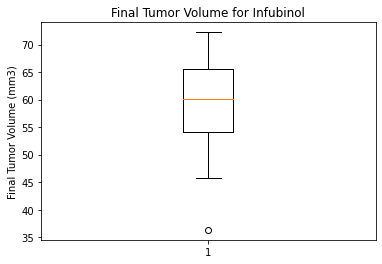

Placebo has no outliers


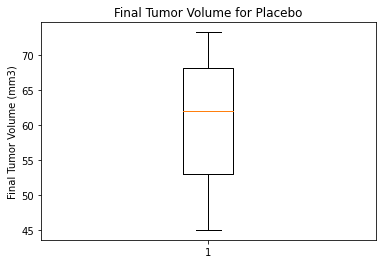

Ceftamin has no outliers


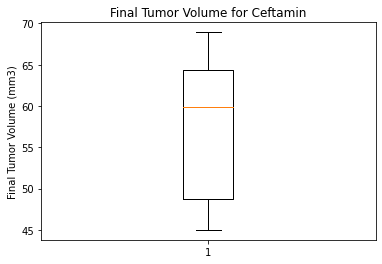

Stelasyn has no outliers


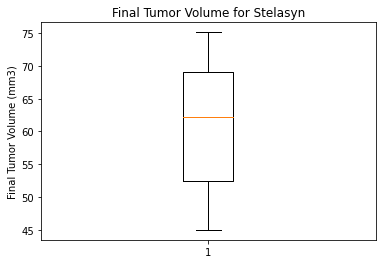

Zoniferol has no outliers


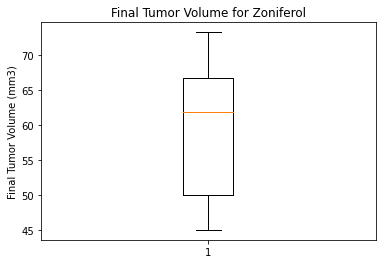

Ramicane has no outliers


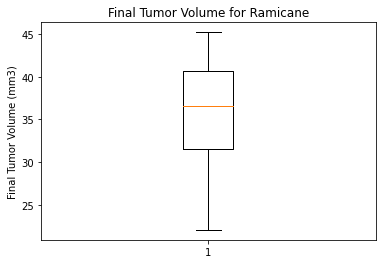

Ketapril has no outliers


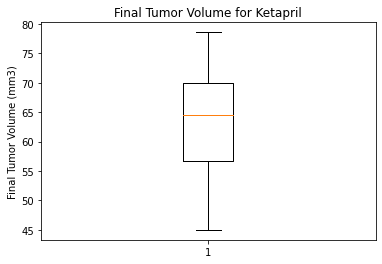

Propriva has no outliers


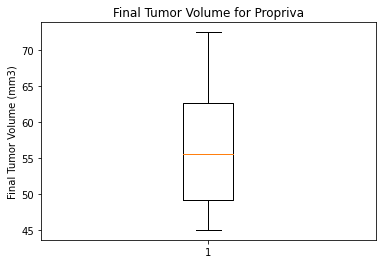

Naftisol has no outliers


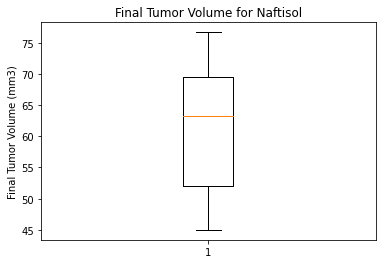

Capomulin has no outliers


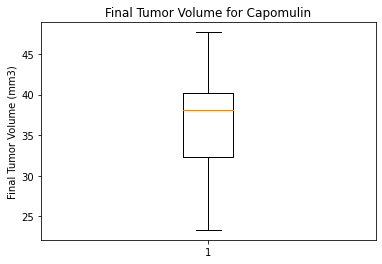

In [96]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments:
  
    treatment_df = tumor_volume.loc[tumor_volume['Drug Regimen']==i,:]

        # Determine outliers using upper and lower bounds
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq +(1.5*iqr)

    upper_outliers = treatment_df.loc[treatment_df['Tumor Volume (mm3)']>upper_bound]
    lower_outliers = treatment_df.loc[treatment_df['Tumor Volume (mm3)']< lower_bound]
    
    if upper_outliers.empty and lower_outliers.empty:
        print(f'{i} has no outliers')
    else:
        print(f'{i} has outliers')
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest    
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Final Tumor Volume for {i}')
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.boxplot(treatment_df['Tumor Volume (mm3)'])
    plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
